# 7. Logistic Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 7.1 Prepare Data

@ Iris Data

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal(꽃잎) length in cm 
2. sepal(꽃잎) width in cm 
3. petal(꽃받침) length in cm 
4. petal(꽃받침) width in cm 
5. class: 
-- Iris Setosa (부채붓꽃)
-- Iris Versicolour (...) 
-- Iris Virginica (...)

In [3]:
iris = datasets.load_iris()

#sepal length in cm, sepal width in cm
X = iris.data[:, :2]

#-- Iris Setosa v.s. -- Iris Versicolour-- Iris Virginica

def f(x) :
    if x < 1 :
        return 0
    else :
        return 1
    
Y = np.array(list(map(f, iris.target)))

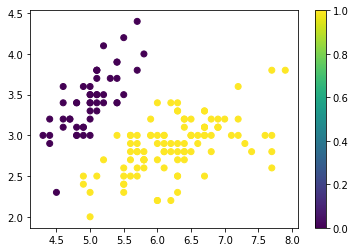

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar()
plt.show()

## 7.2 Define Model

In [5]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).float()

In [6]:
linear = nn.Linear(2, 1, bias = True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid)

In [7]:
#Binary Cross Entropy Loss (이진분류할때 주로 사용)
loss = nn.BCELoss() # probability(1d), y값 (sigmoid 취한걸 넣어줌)
optimizer = optim.SGD(model.parameters(), lr=0.01)

## 7.3 Train Model

In [8]:
for step in range(2000):
    prob = model(x)
    cost = loss(prob, y.view(150, 1))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 200 == 0 :
        print("Step : ",step, ", Cost : ", cost.item())

Step :  0 , Cost :  3.297492742538452
Step :  200 , Cost :  0.5270406603813171
Step :  400 , Cost :  0.4531205892562866
Step :  600 , Cost :  0.39683616161346436
Step :  800 , Cost :  0.3532043993473053
Step :  1000 , Cost :  0.31869667768478394
Step :  1200 , Cost :  0.29086723923683167
Step :  1400 , Cost :  0.26801881194114685
Step :  1600 , Cost :  0.2489578276872635
Step :  1800 , Cost :  0.23283101618289948


## 7.4 Test Model

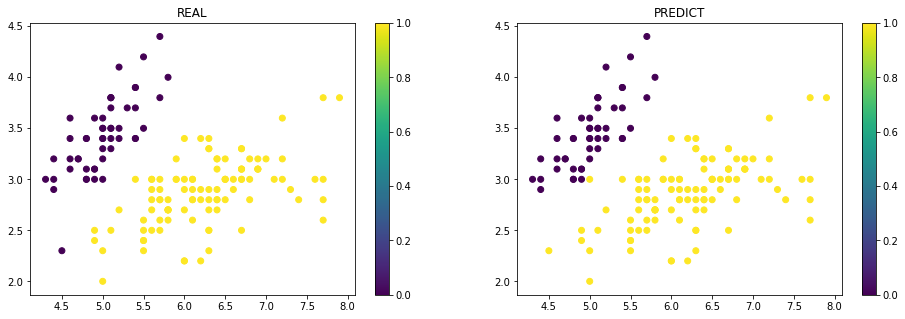

In [9]:
fig = plt.figure(figsize = (16, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = model(x).squeeze().data.numpy() > 0.5)

plt.colorbar(z1_plot,ax=ax1)
plt.colorbar(z2_plot,ax=ax2)

ax1.set_title("REAL")
ax2.set_title("PREDICT")

plt.show()

#### raw 데이터가 linear 하게 분류되기 때문에 가능한 것.